In [1]:
# imports
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
from scipy import stats

# configure default settings for plots
sns.set(context='notebook', palette='Spectral',
        style='darkgrid', font_scale=1.5, color_codes=True)

In [2]:
# model number for file outputs
model_num = 4

# include categorical variables in the model
include_categorical = True

# constants to be used for model
DV = 'price'                # dependent variable

In [3]:
file_path = './diamonds.csv'

# load data from file path, NOTE: data must be in .csv format!
df = pd.read_csv(file_path)
df.head(5)


,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# remove id
del df['Id']

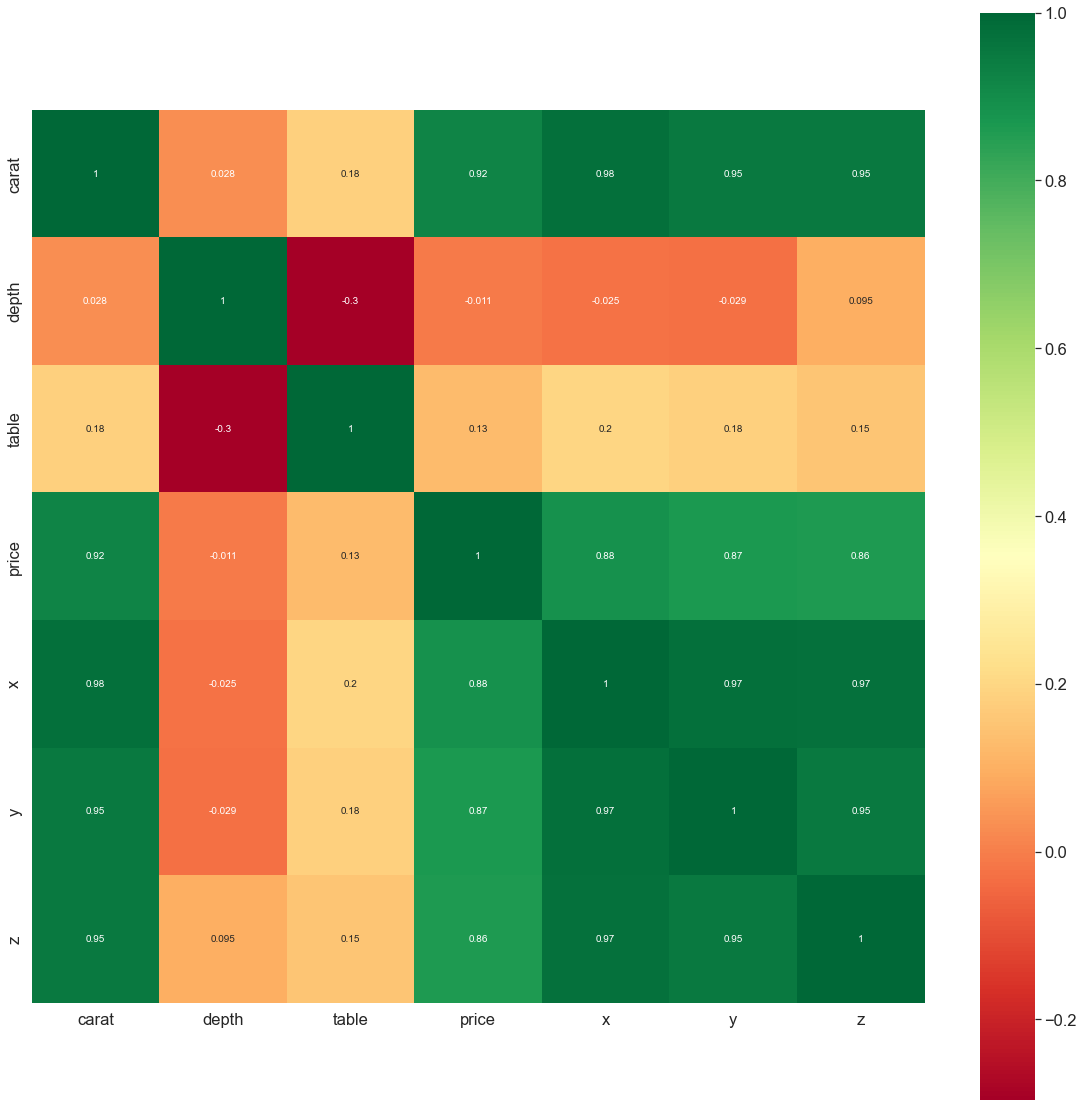

In [5]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', square=True)


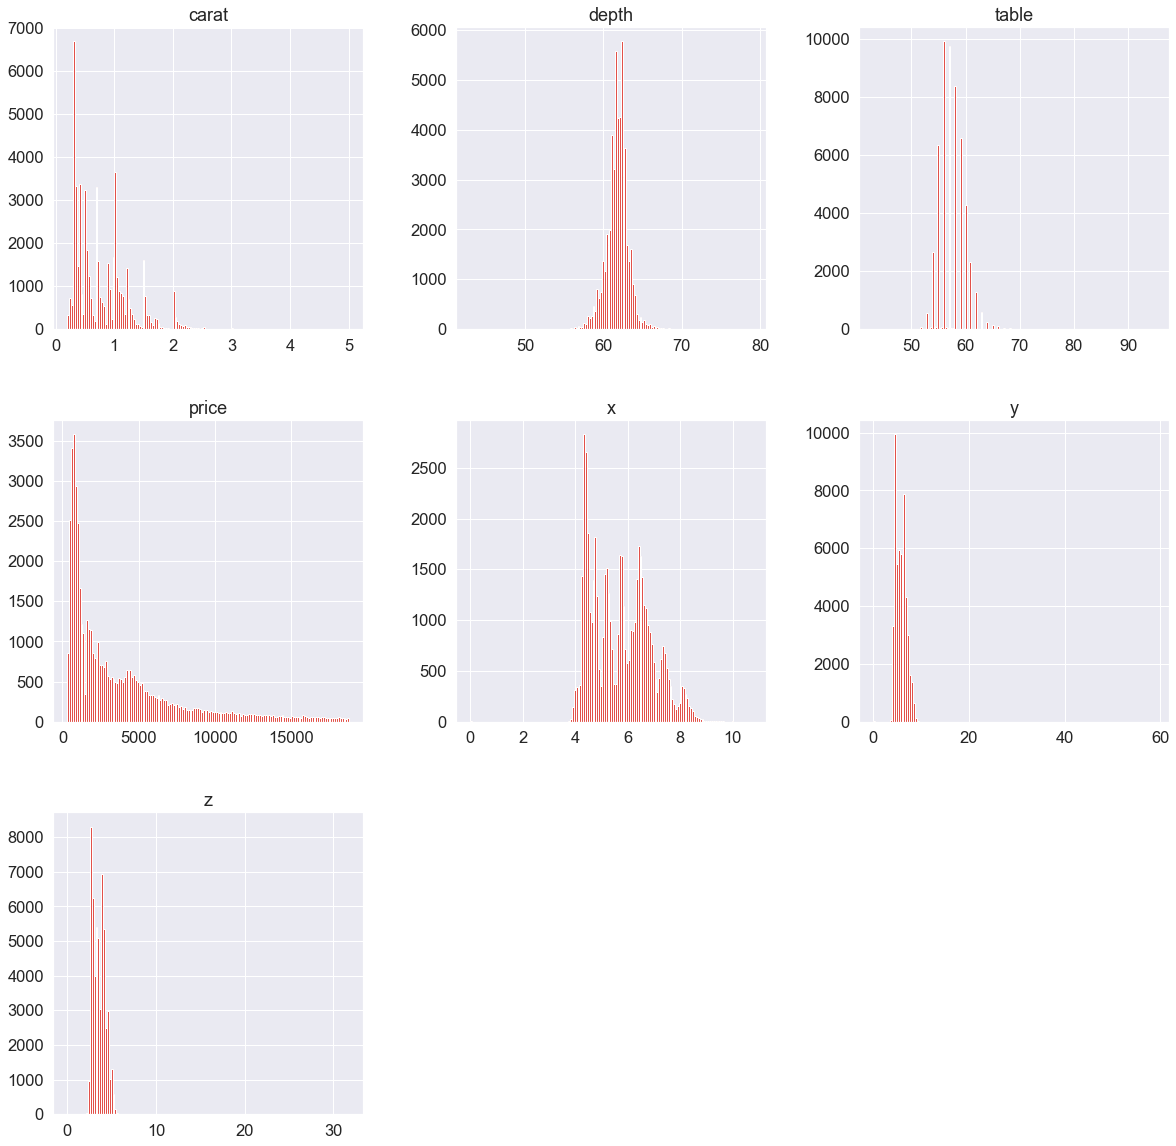

In [6]:
# histogram of all data
p = df.hist(figsize=(20,20), bins=150)

In [7]:
unique_data = {}
for i in df.select_dtypes('object').columns:
    unique_data[i] = df[i].unique()
    print(f'{i} : {df[i].unique()}')

cut : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color : ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [8]:
encoder_data = pd.get_dummies(df)
encoder_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [9]:
cols = encoder_data.columns
df_clean = pd.DataFrame(encoder_data, columns=cols)

In [10]:
if not include_categorical:
    cols_to_exclude = ['cut', 'color', 'clarity']
    df_clean = df.loc[:, ~df.columns.isin(cols_to_exclude)]

df_clean.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler
# only perform scaling if categorical variables were included
if include_categorical:
    scaler = StandardScaler()
    numericals = pd.DataFrame(scaler.fit_transform(df_clean[['carat', 'depth', 'x', 'y', 'z', 'table']]), columns=['carat', 'depth', 'x', 'y', 'z', 'table'], index=df_clean.index)

In [12]:
if include_categorical:
    numericals.head()

In [13]:
if include_categorical:
    df_standard = df_clean.copy(deep=True)
    df_standard[['carat', 'depth', 'x', 'y', 'z', 'table']] = numericals[[
        'carat', 'depth', 'x', 'y', 'z', 'table']]
else:
    df_standard = df_clean.copy(deep=True)


In [14]:
df_standard.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198168,-0.174092,-1.099672,326,-1.587837,-1.536196,-1.571129,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,-1.240361,-1.360738,1.585529,326,-1.641325,-1.658774,-1.741175,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198168,-3.385019,3.375663,327,-1.498691,-1.457395,-1.741175,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071587,0.454133,0.242928,334,-1.364971,-1.317305,-1.287720,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029394,1.082358,0.242928,335,-1.240167,-1.212238,-1.117674,0,1,0,...,0,1,0,0,0,1,0,0,0,0


,carat,table,price,cut_Ideal,cut_Premium,color_E,clarity_I1,clarity_SI2,size
0,-1.198168,-1.099672,326,1,0,1,0,1,-3.832344
1,-1.240361,1.585529,326,0,1,1,0,0,-4.740502
2,-1.198168,3.375663,327,0,0,1,0,0,-3.803048
3,-1.071587,0.242928,334,0,1,0,0,0,-2.315428
4,-1.029394,0.242928,335,0,0,0,0,1,-1.680285


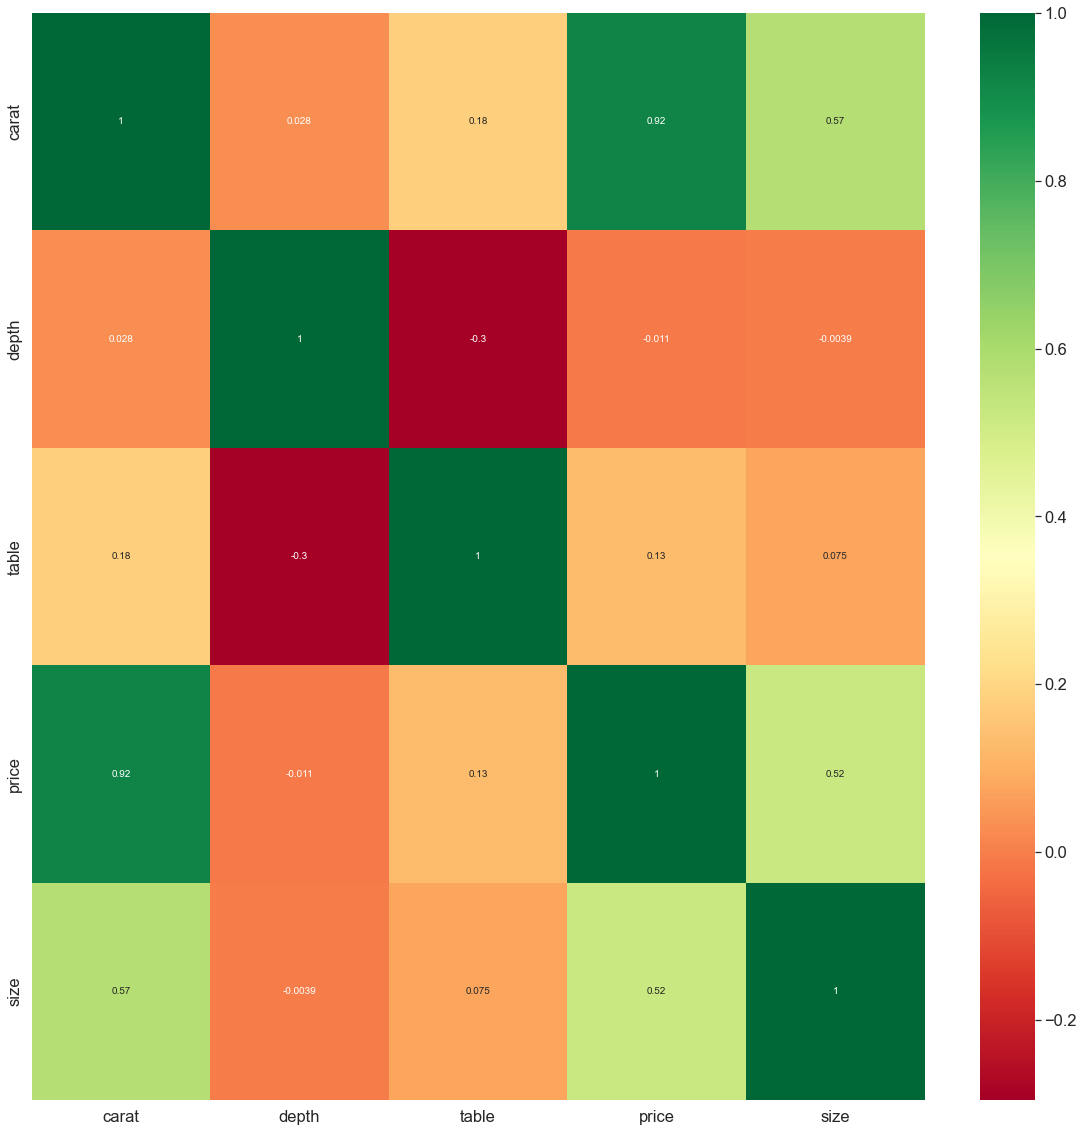

In [15]:
# convert x, y, z to a single column
df_standard['size'] = df_standard['x'] * df_standard['y'] * df_standard['z']

# add any columns that you want to manually remove (any threshold violations)
# add the columns after 'x','y', and 'z'
cols_to_exclude = ['x', 'y', 'z']

# remove x, y, z
df_standard = df_standard.loc[:, ~df_standard.columns.isin(cols_to_exclude)]

plt.figure(figsize=(20, 20))
p = sns.heatmap(df_standard[['carat', 'depth', 'table', 'price', 'size']].corr(), annot=True, cmap='RdYlGn')

if model_num == 2:
    cols_to_exclude.append('size') # by p-value AND multicollinearity
elif model_num == 4:    # remove by correlation, no p-value or multicollinearity violations
    cols_to_exclude.append('depth')
    cols_to_exclude.append('cut_Fair')
    cols_to_exclude.append('cut_Good')
    cols_to_exclude.append('cut_Very Good')
    cols_to_exclude.append('color_D')
    cols_to_exclude.append('color_F')
    cols_to_exclude.append('color_G')
    cols_to_exclude.append('color_H')
    cols_to_exclude.append('color_I')
    cols_to_exclude.append('color_J')
    cols_to_exclude.append('clarity_IF')
    cols_to_exclude.append('clarity_SI1')
    cols_to_exclude.append('clarity_VS1')
    cols_to_exclude.append('clarity_VS2')
    cols_to_exclude.append('clarity_VVS1')
    cols_to_exclude.append('clarity_VVS2')
    

# remove other columns based on p-value and multicollinearity violations
df_standard = df_standard.loc[:, ~df_standard.columns.isin(cols_to_exclude)]

df_standard.head()


In [16]:
# df_standard.to_csv('updated_data.csv')

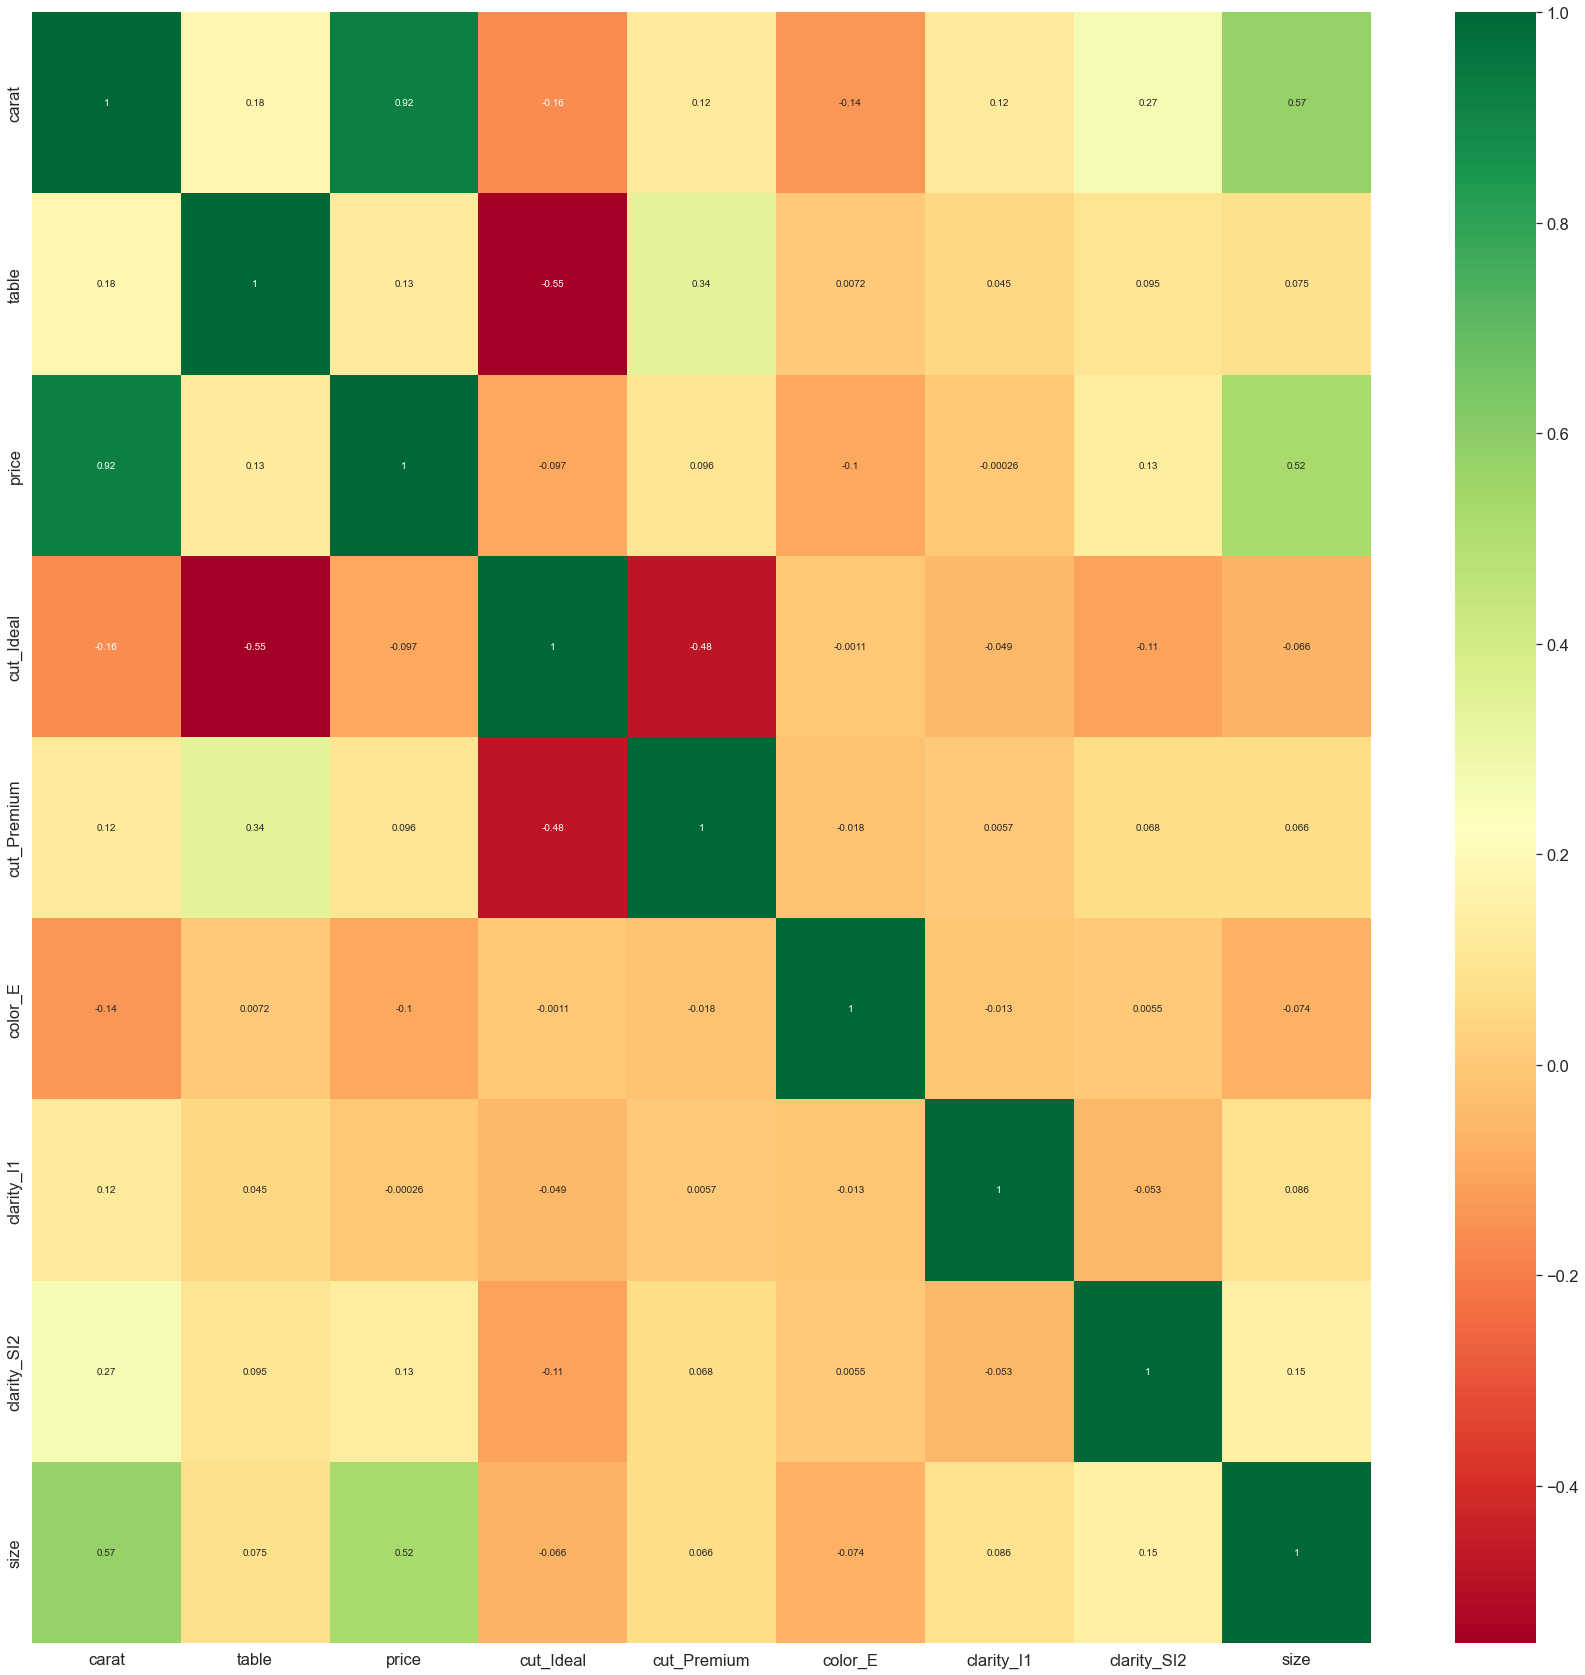

In [17]:
plt.figure(figsize=(30,30))
p = sns.heatmap(df_standard.corr(), annot=True, cmap='RdYlGn')

In [18]:
X = df_standard.drop([DV], axis=1)
y = df_standard[DV]

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=2022, test_size=0.2)

In [19]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression().fit(x_train, y_train)
y_pred = regr.predict(x_test)
with open(f'./model_{model_num}_metrics.txt', 'w') as fh:
    print(f'Accuracy: {regr.score(x_test, y_test) * 100}%')
    fh.write(f'Accuracy: {regr.score(x_test, y_test) * 100}%\n')
    print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
    fh.write(f'MAE: {mean_absolute_error(y_test, y_pred)}\n')
    print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred) * 100}%')
    fh.write(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred) * 100}%\n')
    print(f'R Squared: {r2_score(y_test, y_pred)}')
    fh.write(f'R Squared: {r2_score(y_test, y_pred)}\n')
    print('----------------------------------------------------')
    fh.write('----------------------------------------------------\n')
    print(f'Intercept: {regr.intercept_}')
    fh.write(f'Intercept: {regr.intercept_}\n')
    for feature, coef in zip(x_train.columns, regr.coef_):
        print(f'{feature} : {coef}')
        fh.write(f'{feature} : {coef}\n')


Accuracy: 88.52533288842791%
MAE: 905.4954116123963
MAPE: 39.19748489166378%
R Squared: 0.8852533288842791
----------------------------------------------------
Intercept: 3989.061249111674
carat : 3943.697183836577
table : -64.34975507577653
cut_Ideal : 347.05162572932534
cut_Premium : 164.3490728659301
color_E : 369.64958806043325
clarity_I1 : -4177.474342501225
clarity_SI2 : -1450.7758942612918
size : -7.8930168055274805


In [20]:
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)

In [21]:
est = sm.OLS(y_train, x_train).fit()
est.summary()

# with open(f'model_{model_num}.txt', 'w') as fh:
#     fh.write(est.summary().as_text())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 4.053e+04
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        20:05:00   Log-Likelihood:            -3.7271e+05
No. Observations:               43152   AIC:                         7.454e+05
Df Residuals:                   43143   BIC:                         7.455e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3989.0612     12.507    318.953      0.000    3964.548    4013.575
carat        3943.6972      8.247    478.204      0.000    3927.533    3959.861
table         -64.3498      7.931     -8.113      0.000     -79.895     -48.804
cut_Ideal     347.0516     17.367     19.983      0.000     313.012     381.092
cut_Premium   164.3491     17.236      9.535      0.000     130.566     198.132
color_E       369.6496     17.207     21.483      0.000     335.924     403.375
clarity_I1  -4177.4743     56.567    -73.850      0.000   -4288.347   -4066.602
clarity_SI2 -1450.7759     18.276    -79.382      0.000   -1486.597   -1414.955
size           -7.8930      1.765     -4.472      0.000     -11.352      -4.434
==============================================================================
Omnibus:                    13683.502   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           119279.108
Skew:                           1.278   Prob(JB):                         0.00
Kurtosis:                      10.734   Cond. No.                         38.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
y_pred = est.predict(x_test)

In [23]:
# predict a real-life example https://www.gemselect.com/diamond/diamond-460459.php
d = {}
cols = x_test.columns
for feature, val in zip(cols, x_test.iloc[0]):
    if feature == 'const':
      continue
    d[feature] = val

length = 7.32
width = 7.32
depth = 4.82
d['carat'] = 2.31
d['size'] = length * width * depth

example = pd.DataFrame(data=d, index=[0])
example


,carat,table,cut_Ideal,cut_Premium,color_E,clarity_I1,clarity_SI2,size
0,2.31,-1.099672,1.0,0.0,0.0,0.0,0.0,258.267168


In [26]:
y_pred = regr.predict(example)
print(y_pred)

[3826.10329848]
